### About the data
Below data is related to the amount of money spent on marketing by a company through different modes and the sales the company made during the same period.

### Type of Data
TV:TV promotion budget (in million)-- Type of data= continuos data
Social Media: Social Media promotion budget (in million)-- Type of data= continuos data
Radio: Radio promotion budget (in million)-- Type of data= continuos data
Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer-- Categorical
Sales (in million)-- Type of data= continuos data

### Problem Statement
To explore the data and 
To understand the impact of money spent on advertising through different channels on sales.

### 3 objectives to solve the underlying business problem.

1)To have a better understanding of the data.

2)To understand the correlation between mode of advertisement and sales

3)To understand how Sales varies with the mode of advertisement and the related values.

In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
#Importing the libraries required

In [7]:
#importing the dataset
df= pd.read_csv('ETE_data.csv')
df.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [8]:
#Checking for missing values
df.isna().sum()

#Conclusion: There are 10 missing values in the column Tv, 4 in Radio, 6 in social media and 6 in sales.

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [11]:
Tv= df['TV']
Rd= df['Radio']
Sm= df['Social Media']
Sl= df['Sales']

53.0


TV              0
Radio           4
Social Media    6
Influencer      0
Sales           6
dtype: int64

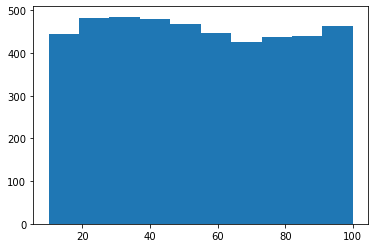

In [30]:
#Imputing the missing data
plt.hist(Tv)
# Amount spent on TV ads is not normally distributed, hence the missing values need to be imputed with median
med_Tv= Tv.median()
print(med_Tv)
df['TV'].fillna(med_Tv,inplace=True)
df.isna().sum()

17.85951293


TV              0
Radio           0
Social Media    6
Influencer      0
Sales           6
dtype: int64

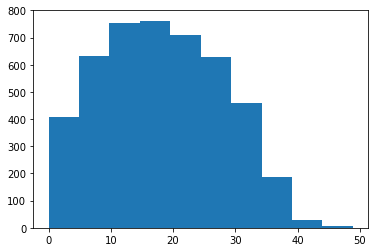

In [32]:
plt.hist(Rd)
## Amount spent on Radio ads is not normally distributed, hence the missing values need to be imputed with median
med_Rd= Rd.median()
print(med_Rd)
df['Radio'].fillna(med_Rd,inplace=True)
df.isna().sum()

3.055565435


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           6
dtype: int64

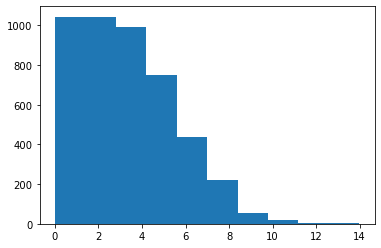

In [33]:
plt.hist(Sm)
## Amount spent on Social Media ads is not normally distributed, hence the missing values need to be imputed with median
med_sm= Sm.median()
print(med_sm)
df['Social Media'].fillna(med_sm,inplace=True)
df.isna().sum()


189.23117235


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

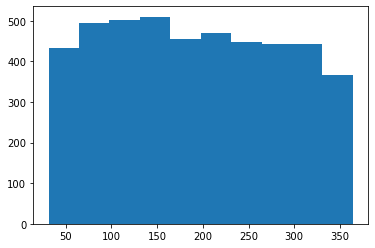

In [34]:
plt.hist(Sl)
## Net Sales Amount is not normally distributed, hence the missing values need to be imputed with median
med_Sl= Sl.median()
print(med_Sl)
df['Sales'].fillna(med_Sl,inplace=True)
df.isna().sum()

In [45]:
df
#Replacing the Influencer field with numbers(Categorical Variable)(for Mega it is 1, for Micro it is 2,for Nano it is 3 and for macro it 
#is 4)
df.Influencer[df.Influencer=="Mega"]=1
df.Influencer[df.Influencer=="Micro"]=2
df.Influencer[df.Influencer=="Nano"]=3
df.Influencer[df.Influencer=="Macro"]=4
df

C:\Users\91767\AppData\Local\Temp/ipykernel_21028/240977105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Influencer[df.Influencer=="Mega"]=1
C:\Users\91767\AppData\Local\Temp/ipykernel_21028/240977105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Influencer[df.Influencer=="Micro"]=2
C:\Users\91767\AppData\Local\Temp/ipykernel_21028/240977105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Influencer[df.Influen

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,4,253.610411


### Now that the data is clean and there are no missing values ETA can be started

#### Structure of Data

In [47]:
df.dtypes #Knowing the datatypes and ensuring that we have appropriate datatypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [48]:
df.shape #Shape of the data: There are a total of 4572 rows and 5 columns in the dataset

(4572, 5)

In [69]:
df.columns #Column names in the dataset
inf= df['Influencer']

Text(0.5, 1.0, 'Histogram- Amount of money spent on Tv Ads')

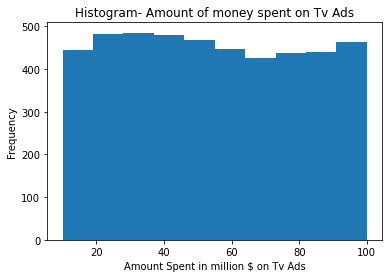

In [108]:
#plotting Histograms
plt.hist(Tv)
plt.xlabel('Amount Spent in million $ on Tv Ads')
plt.ylabel('Frequency')
plt.title("Histogram- Amount of money spent on Tv Ads")




# Amount spent on TV ads is not normally distributed

Text(0.5, 1.0, 'Histogram- Sales')

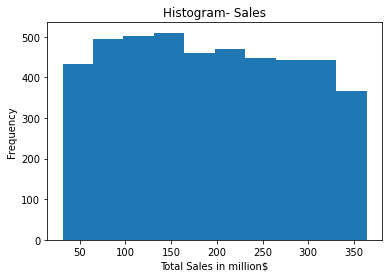

In [106]:
plt.hist(Sl)
plt.xlabel('Total Sales in million$')
plt.ylabel('Frequency')
plt.title("Histogram- Sales")


## Net Sales Amount is not normally distributed

Text(0.5, 1.0, 'Histogram- Amount of money spent on Social Media Ads')

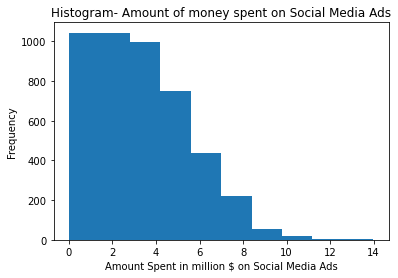

In [107]:
plt.hist(Sm)
plt.xlabel('Amount Spent in million $ on Social Media Ads')
plt.ylabel('Frequency')
plt.title("Histogram- Amount of money spent on Social Media Ads")
## Amount spent on Social Media ads is not normally distributed.

Text(0.5, 1.0, 'Histogram- Amount of money spent on Radio Ad')

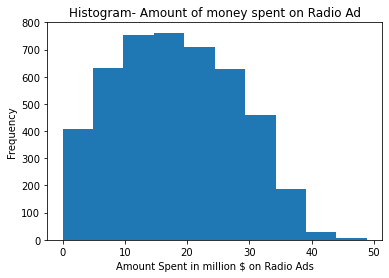

In [105]:
plt.hist(Rd)
plt.xlabel('Amount Spent in million $ on Radio Ads')
plt.ylabel('Frequency')
plt.title("Histogram- Amount of money spent on Radio Ad")

## Amount spent on Radio ads is not normally distributed, hence the missing values need to be imputed with median


### Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

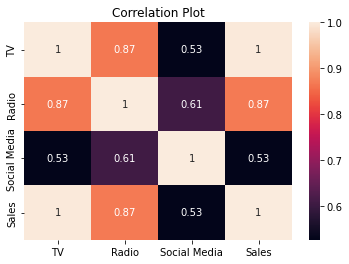

In [114]:
#Correlation between different variables
sb.heatmap(df.corr(),annot=True)
plt.title("Correlation Plot")

#Interpretations: There is strong positive correlation between Sales 
#and the amount spent on ads on Tv and Radio, medium correlation between Sales and amount spent on ads on Social Media


Text(0.5, 1.0, 'Share of each type of influencer in the dataset')

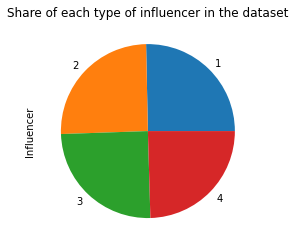

In [113]:
#To know the number of different types of influencers used
inf.value_counts().plot(kind='pie')
plt.title("Share of each type of influencer in the dataset")

#Conclusion: Number of influencers are equally split at 25% each

### Scatter plots


Text(0.5, 1.0, 'Scatter Plot- Amount of money spent on TV Ads v Sales')

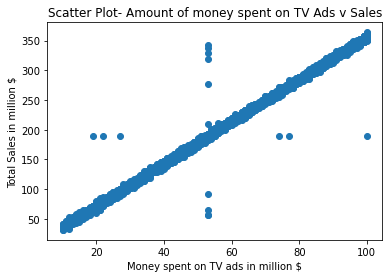

In [110]:
plt.scatter(Tv,Sl)
plt.xlabel('Money spent on TV ads in million $')
plt.ylabel('Total Sales in million $')
plt.title("Scatter Plot- Amount of money spent on TV Ads v Sales")

#Interpretation: As we can see the Sales vary in a linear fashion with the money spent on TV

Text(0.5, 1.0, 'Scatter Plot- Amount of money spent on Radio Ads v Sales')

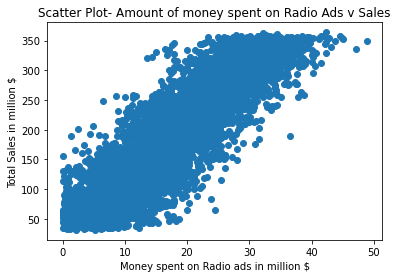

In [109]:
#Scatter Plot (Radio ads v Sales)
plt.scatter(Rd,Sl)
plt.xlabel('Money spent on Radio ads in million $')
plt.ylabel('Total Sales in million $')
plt.title("Scatter Plot- Amount of money spent on Radio Ads v Sales")

#Interpretation: As we can see the Sales vary in a linear fashion with the money spent on TV but it is not as perfectly lineary related as TV ads

Text(0.5, 1.0, 'Scatter Plot- Amount of money spent on Social media Ads v Sales')

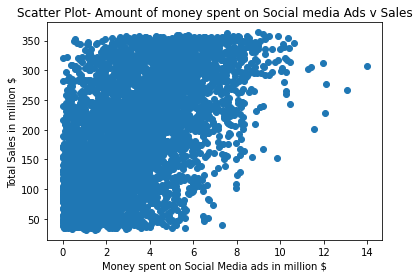

In [111]:
#Scatter Plot (Social Media ads v Sales)
plt.scatter(Sm,Sl)
plt.xlabel('Money spent on Social Media ads in million $')
plt.ylabel('Total Sales in million $')
plt.title("Scatter Plot- Amount of money spent on Social media Ads v Sales")

#Interpretation: We can see that the company has spent very less on social media ads when compared to TV ads and Radio Ads. 
#Also there is medium correlation between money spent on social media and Total Sales

In [101]:
#Calculating the average amount spent on each influencer
mega=df[df['Influencer']==1]
micro= df[df['Influencer']==2]
nano= df[df['Influencer']==3]
macro= df[df['Influencer']==4]

a=mega['Sales'].mean()
b=micro['Sales'].mean()
c=nano['Sales'].mean()
d=macro['Sales'].mean()

data= [["Mega",a],["Micro",b],["Nano",c],["Macro",d]]
df1 = pd.DataFrame(data, columns = ['Type of Influencer', 'Average Sales'])
df1
col1= df1['Type of Influencer']
col2= df1['Average Sales']

Text(0.5, 1.0, 'Type of influencerwise Sales')

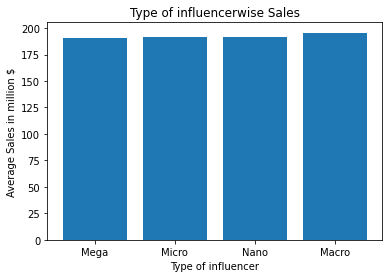

In [112]:
plt.bar(col1,col2)
plt.xlabel("Type of influencer")
plt.ylabel("Average Sales in million $")
plt.title("Type of influencerwise Sales")

#Interpretation: Average Sales from each of the type of the influencers is almost same. Since the charges for mega influencers is high, it is hence advisable to spend more on micro and nano influencers


### Business Recommendations

1.Average Sales from each of the type of the influencers is almost same. Since the charges for mega influencers is high, it is hence advisable to spend more on micro and nano influencers.
2.TV ads bring much higher revenue when compared to other forms of media. Hence the amount spent and there is a clear correlation between amount spent on TV ads and Sales
3.Different models of machine learning can be applied to predict future sales.


### Conclusion

The given sales and marketing data is analysed and hence some conclusions that can be drawn are
1.The data is not normally distributed.
2.There is a need for data of different attributes.For Example ; Regionwise data